In [3242]:
try:
    from keras_preprocessing import image as img
    import os
    from matplotlib import pyplot as plt
    import idx2numpy
    import keras_preprocessing
    import tensorflow as tf
    import numpy as np
    import keras
    from functools import partial
except:
    %pip install manim
    %pip install colour
    %pip install matplotlib
    %pip install tensorflow.keras
    %pip install pydot
    %pip install pydotplus
    %pip install graphviz
    %pip install ipykernel
    %pip install keras_preprocessing
    %pip install matplotlib
    %pip install idx2numpy
    %pip install pillow
    %pip install tensorflow==2.18.0
    %pip install keras==3.8.0
    from keras_preprocessing import image as img
    import os
    from matplotlib import pyplot as plt
    import idx2numpy
    import keras_preprocessing
    import tensorflow as tf
    import numpy as np
    import keras
    from functools import partial

In [3243]:
plt.figure(figsize=(19,10))

<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

In [3244]:
modelo_dig = tf.keras.models.load_model("model_network/output00.h5")

In [3245]:
nbits = 128
point_fixed = 8

In [3246]:
os.system("rm ./simulation/I.txt")

0

In [3247]:
sizt = 28
path = "mnist/data/t10k-images-idx3-ubyte"

In [3248]:
def int2comp2(val, nbits=nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))


In [3249]:
def comp2int(val, nbits=nbits):
    val=int(val,16)
    if(val & 1 << nbits-1):
        return (~val+1)%(1<<nbits)*(-1)
    return val


In [3250]:
def concat(n,nbits=nbits,fator=1):
    return [comp2int(n,nbits)/fator]

In [3251]:
def concat2(n,nbits=nbits,fator=16):
    # print([comp2int(n,nbits)/fator])
    return [comp2int(n,nbits)/fator]

In [3252]:
def import_img(path_file,fator=1):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat,i.split())))
    plt.imshow(m2,cmap="gray")
    # plt.imsave('fig7.png',m2,cmap='gray')
    return np.array(m2).copy()

In [3253]:
def import_img2(path_file,fator=1):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat2,i.split())))
    plt.imshow(m2,cmap ='viridis')
    plt.imsave('fig7.png',m2,cmap='binary')
    return np.array(m2).copy()

In [3254]:
def exportInput_txt(imag,path_file,nbits=16,fixed_point=8):
    for i in imag:
        for j in i:
            # strtmp = int2comp2(1 if(j >=50) else 0, nbits)[2:]
            strtmp = int2comp2((int(j/255*2**fixed_point)), nbits)[2:]

            strtmp2 = strtmp+' '
            print(strtmp2,end=' ')
            path_file.write(strtmp2)
            # print(f'{strtmp2}',end='  ')
        print("\n")
        path_file.write("\n")
    path_file.close()


In [3255]:
def kernel_txt(nbits,point_fixed,i,j,kernel,string='Kernel'):
    ker = open(f"simulation/{string}{j}{i}.txt",'w')
    kernel0_0 = np.array(kernel)
    for i in kernel0_0:
        for j in i:
            print(int((j*2**point_fixed)),end=' ')
            strtmp2 = int2comp2(int(j*2**point_fixed),nbits)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        ker.write("\n")
        print('\n')
    ker.close()

In [3256]:
def bias_txt(nbits,point_fixed,i,bias,string='bias'):
    ker = open(f"simulation/{string}{i}.txt",'w')
    kernel0_0 = np.array(bias)
    base = point_fixed
    print(base)
    for j in kernel0_0:
        # for j in i:
            print((int(j*2**base)),end=' ')
            strtmp2 = int2comp2(int(j*2**point_fixed),nbits)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        # ker.write("\n")
            # print('\n')
    ker.close()

In [3257]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

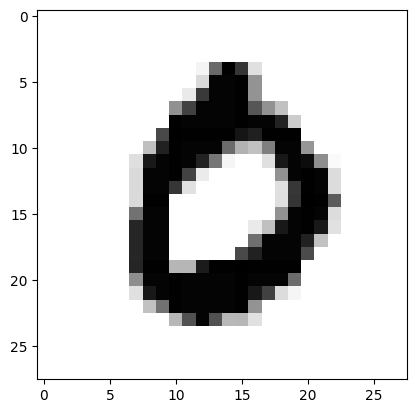

In [3258]:
array = idx2numpy.convert_from_file(path)[3]
plt.imshow(array,cmap='binary')
# array

In [3259]:
exportInput_txt(imag=array,path_file=f)

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  b  96  fd  ca  1f  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  25  fb  fb  fd  6b  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  15  c5  fb  fb  fd  6b  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  6e  be  fb  fb  fb  fd  a9  6d  3e  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  fd  fb  fb  fb  fb  fd  fb  fb  dc  33  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  b6  100  fd  fd  fd  fd  ea  de  fd  fd  fd  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  3f  dd  fd  fb  fb  fb  93  4d  3e  80  fb  fb  69  0  0  0  0  0  0  

In [3260]:
array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [3261]:
modelo_dig.predict(array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [3262]:
modelo_dig.predict(array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [3263]:
modelo_dig.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 2)      │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 4)      │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,140 (4.46 KB)

 Trainable params: 1,138 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3264]:
kernels = modelo_dig.weights[5]


In [3265]:
bias = np.array(modelo_dig.weights[1])

In [3266]:
bias_txt(nbits,point_fixed,0,modelo_dig.weights[1])

8
-23 -42 

In [3267]:
bias_txt(nbits,point_fixed,5,modelo_dig.weights[5])

8
5 183 -13 -134 49 49 -64 128 -187 -123 

In [3268]:
cc = modelo_dig.weights[4]

In [3269]:
bias_txt(nbits,point_fixed,2,modelo_dig.weights[1])

8
-23 -42 

In [3270]:
modelo_dig.weights[0]
kernels = modelo_dig.weights[0]
kernels;

In [3271]:
bias_txt(nbits,point_fixed,2,modelo_dig.weights[3])


8
-66 -85 -14 -38 

In [3272]:
lim = np.array(kernels.shape)[::-1][0]
for i in range(lim):
    kernel_txt(nbits,point_fixed,i,0,modelo_dig.weights[0][:,:,0,i])
    print("--------------------------------------------------------------------",i+1)

-17 17 -99 49 114 

-41 -50 141 87 80 

-34 90 104 160 -54 

59 122 85 67 -71 

69 72 19 27 -80 

-------------------------------------------------------------------- 1
-10 -11 -10 -27 -60 

106 -20 -47 -9 -129 

111 97 46 -34 61 

75 150 69 182 87 

-30 63 90 9 95 

-------------------------------------------------------------------- 2


kernel0

In [3273]:
#  modelo_dig.weights[2].shape

In [3274]:
# lims = int(np.array(kernels2d_1.shape)[::-1][0])
# limi = int(np.array(kernels2d_1.shape)[::-1][1])
# (limi,lims)

In [3275]:
kernels2d_1 = modelo_dig.weights[2]
lims = int(np.array(kernels2d_1.shape)[::-1][0])
limi = int(np.array(kernels2d_1.shape)[::-1][1])
for i in range(limi):
    for j in range(lims):
        print("-------------------------------",i+1,j+1)
        kernel_txt(nbits,point_fixed,j,i,kernels2d_1[:,:,i,j],string=f"kernels2d_")


------------------------------- 1 1
82 -11 -35 

13 269 102 

123 193 245 

------------------------------- 1 2
-80 -90 -57 

10 131 120 

-6 -122 -43 

------------------------------- 1 3
-137 -106 -64 

61 29 45 

-71 -33 -33 

------------------------------- 1 4
67 -13 75 

144 34 -11 

-52 46 -18 

------------------------------- 2 1
5 -129 -22 

-113 -123 -119 

-20 -120 -60 

------------------------------- 2 2
111 187 170 

93 -51 -10 

-106 -87 -135 

------------------------------- 2 3
77 -90 113 

246 123 45 

82 72 -50 

------------------------------- 2 4
-44 84 -15 

-19 83 -65 

79 -6 141 



In [3276]:
kernel_txt(nbits,point_fixed,0,0,modelo_dig.weights[4],string="danse.txt")

-81 -133 -69 -107 -40 -45 14 -148 20 -21 

-224 -128 6 -73 -11 -216 -164 -51 -230 -270 

-84 -43 -122 -57 36 -115 -91 -17 -109 -25 

-93 -107 -126 -60 -52 -103 16 12 -37 -121 

-115 -115 -64 -102 37 -39 2 -74 12 12 

-96 -46 -29 42 -315 -131 -257 -7 -51 -22 

-92 -80 -64 -33 9 5 -120 48 -10 -62 

-57 -65 -18 -60 3 -22 -44 24 -27 -104 

-46 -41 -74 -96 -10 -32 37 -58 -26 16 

-106 -311 11 -48 -277 -56 -54 43 -53 -82 

4 -84 -61 -10 -142 -28 -164 -4 -63 58 

-20 32 -14 -49 24 -98 -62 31 21 -109 

-100 4 -129 -98 86 -8 -35 -24 -82 -112 

-41 -111 -89 -61 -346 111 70 -77 -79 -93 

16 -25 20 38 -74 -94 -215 -25 -52 56 

27 4 -7 -23 1 -61 -128 -99 32 18 

-102 -22 -175 -189 77 101 -52 -30 -136 -141 

-133 -109 -111 -179 -115 -49 57 -216 -85 -253 

3 -111 -21 -90 14 33 -145 -48 46 28 

-17 -25 -95 -58 0 2 14 -16 -6 -23 

-2 -58 -139 -132 8 -96 45 -119 -104 30 

-108 -43 65 39 -290 -120 -421 -51 -187 -222 

-63 -68 26 -70 -82 -175 -126 -32 -69 -56 

-32 -23 -72 -26 -101 -76 -4 -108 -1 -66 

0 

In [3277]:
import subprocess
subprocess.run('cds',shell=True)
subprocess.run('cds && runp.sh',shell=True)

/bin/sh: cds: command not found
/bin/sh: cds: command not found


CompletedProcess(args='cds && runp.sh', returncode=127)

In [3278]:
out = open("simulation/maxpooling0.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


In [3279]:
# array_out =[]

# for i in range(1):
#     array_out.append(open(f"./simulation/maxIxKernelPooling{i}.txt","r"))
# klin2 = []
# plt.figure(figsize=(30,2))
# for ii in range(2):
#     k2 = array_out[ii].readlines()
#     m2=[]
#     for i in k2:
#         m2.append(list(map(concat,i.split())))
#     plt.subplot(1,2,ii+1)
#     plt.imshow(m2,cmap="gray")
# # plt.imshow(m2)

# for i in range(2):
#     array_out[i].close()


In [3280]:
# m2

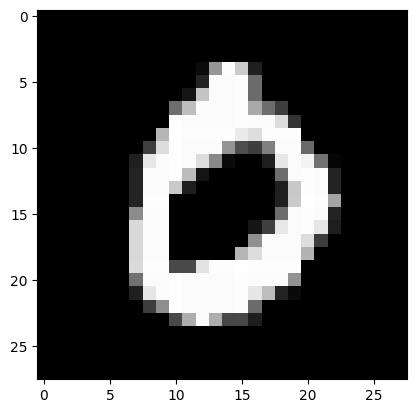

In [3281]:
out2 = open("./simulation/I.txt","r")
import_img(path_file=out2);

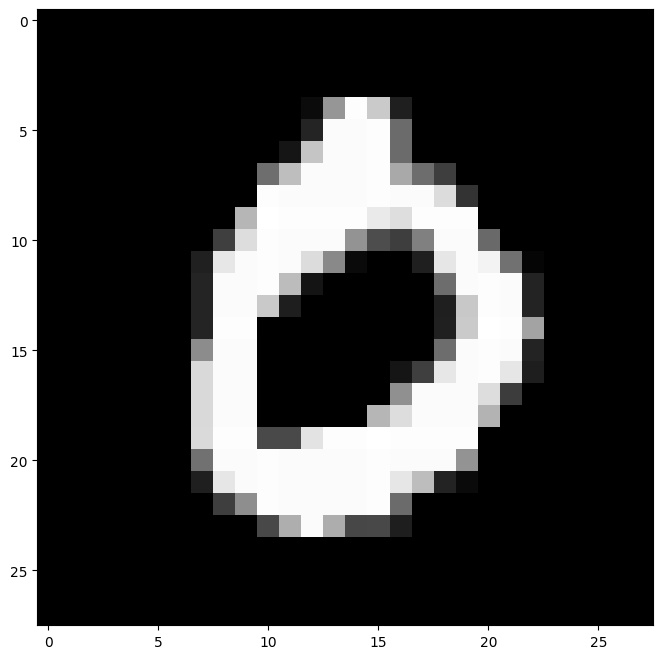

In [3282]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")


In [3283]:
plt.imsave("7.png",array,cmap="gray")

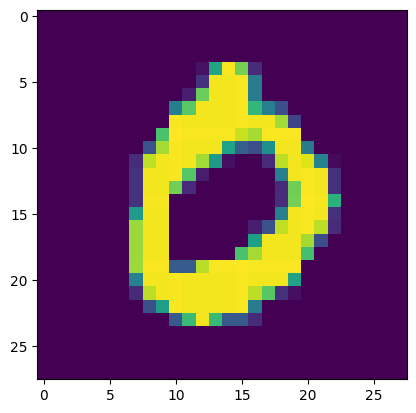

In [3284]:
a = import_img2(path_file=open('./simulation/I.txt'));
plt.imsave('fig7.png',a.reshape(28,28),cmap='binary')
# a.shape

In [3285]:
a;

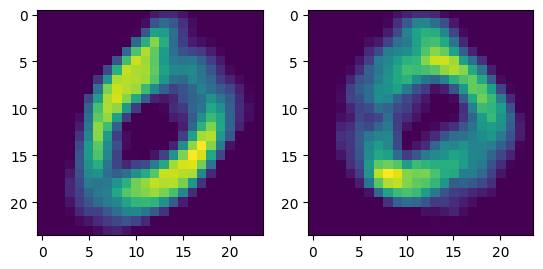

In [3286]:
plt.subplot(1,2,1)
import_img2(path_file=open('simulation/convIxKernelOut0.txt'));
plt.subplot(1,2,2)
import_img2(path_file=open('simulation/convIxKernelOut1.txt'));

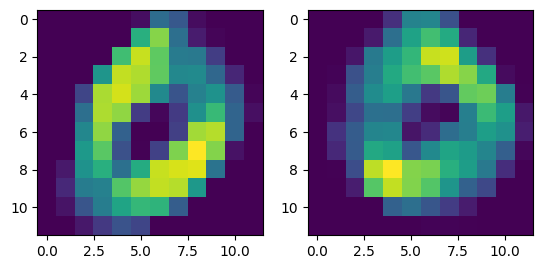

In [3287]:
plt.subplot(1,2,1)
import_img2(path_file=open('simulation/maxpooling0.txt'));
plt.subplot(1,2,2)
import_img2(path_file=open('simulation/maxpooling1.txt'));


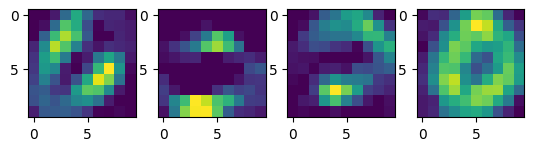

In [3288]:
plt.subplot(1,4,1)
import_img2(path_file=open('simulation/convIxKernelOut_F01.txt'));
plt.subplot(1,4,2)
import_img2(path_file=open('simulation/convIxKernelOut_F02.txt'));
plt.subplot(1,4,3)
import_img2(path_file=open('simulation/convIxKernelOut_F03.txt'));
plt.subplot(1,4,4)
import_img2(path_file=open('simulation/convIxKernelOut_F04.txt'));
print()

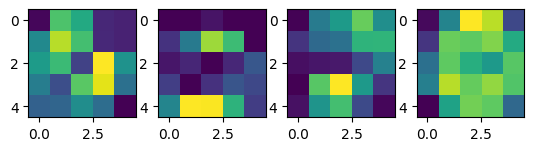

In [3289]:
plt.subplot(1,4,1)
import_img2(path_file=open('simulation/maxpoolingF1.txt'));
plt.subplot(1,4,2)
import_img2(path_file=open('simulation/maxpoolingF2.txt'));
plt.subplot(1,4,3)
import_img2(path_file=open('simulation/maxpoolingF3.txt'));
plt.subplot(1,4,4)
import_img2(path_file=open('simulation/maxpoolingF4.txt'));

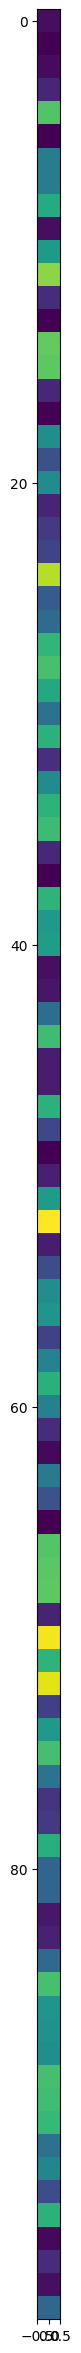

In [3290]:
plt.figure(figsize=(40,30))
import_img2(path_file=open('simulation/flatten.txt'));

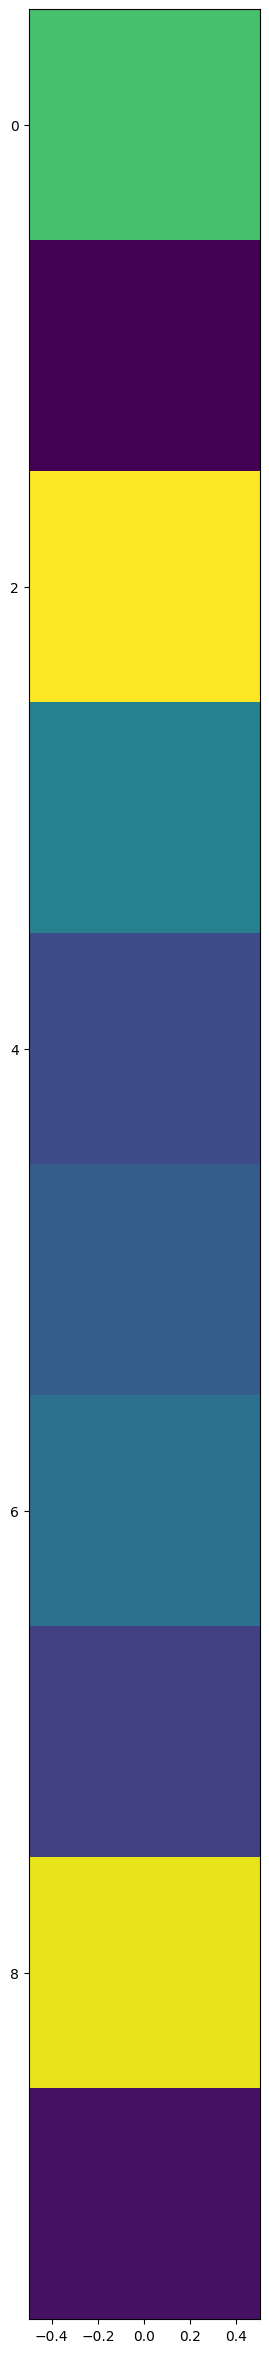

In [3291]:
plt.figure(figsize=(40,30))
import_img2(path_file=open('simulation/dense.txt'));

In [3292]:
# plt.imsave()

In [3293]:
# img.save_img("./images/preprocessamento.jpg",array)


In [3294]:
# os.system("rm ./images/preprocessamento.jpg")
# os.system("rm ./images/posprocessamento.jpg")

# img.save_img("./images/preprocessamento.jpg",array)
# img.save_img("./images/posprocessamento.jpg",m1)
# img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


In [3295]:
dens = open("simulation/dense.txt")
klin2 = []
m2=[]
k2 = dens.readlines()
for i in k2:
    m2.append(list(map(concat,i.split()))[0][0])
    print(m2)
m2 =(np.array(m2))
m2
(np.array(m2,int))

[-984447390.0]
[-984447390.0, -1931647961.0]
[-984447390.0, -1931647961.0, -598925384.0]
[-984447390.0, -1931647961.0, -598925384.0, -1347727802.0]
[-984447390.0, -1931647961.0, -598925384.0, -1347727802.0, -1621049607.0]
[-984447390.0, -1931647961.0, -598925384.0, -1347727802.0, -1621049607.0, -1536979857.0]
[-984447390.0, -1931647961.0, -598925384.0, -1347727802.0, -1621049607.0, -1536979857.0, -1437381826.0]
[-984447390.0, -1931647961.0, -598925384.0, -1347727802.0, -1621049607.0, -1536979857.0, -1437381826.0, -1681263079.0]
[-984447390.0, -1931647961.0, -598925384.0, -1347727802.0, -1621049607.0, -1536979857.0, -1437381826.0, -1681263079.0, -643495879.0]
[-984447390.0, -1931647961.0, -598925384.0, -1347727802.0, -1621049607.0, -1536979857.0, -1437381826.0, -1681263079.0, -643495879.0, -1869392354.0]


array([ -984447390, -1931647961,  -598925384, -1347727802, -1621049607,
       -1536979857, -1437381826, -1681263079,  -643495879, -1869392354])

In [3296]:
m2.argmax()

np.int64(2)

In [3297]:
a =m2
n = 48
s = sum([np.exp(a[i]/2**n) for i in range(len(a))])
print(s)
h = np.array([np.exp(a[i]/2**n)/s for i in range(len(a))])
(h.argmax(),h.max())

9.999951497377895


(np.int64(2), np.float64(0.10000027224672746))

In [3298]:
-np.array(m2/2**32,float)

array([0.22920952, 0.44974684, 0.13944818, 0.31379233, 0.37743002,
       0.35785601, 0.33466654, 0.39144956, 0.14982556, 0.43525183])

In [3299]:
a =-np.array(m2/2**32,float)
n = 0
s = sum([np.exp(a[i]/2**n) for i in range(len(a))])
print(s)
h = np.array([np.exp(a[i]/2**n)/s for i in range(len(a))])
(h.argmax(),h.max())

13.816137849276918


(np.int64(1), np.float64(0.11348433374882792))